#### **Import Libs**

In [1]:
import pandas as pd
import numpy as np

from xgboost import XGBClassifier

#### **Getting training && validation data**

In [2]:
df_train = pd.read_csv('../databases/training.csv')
df_test = pd.read_csv('../databases/test.csv')

In [3]:
X_train, y_train = df_train.drop(['IND_BOM_1_1'], axis=1), df_train['IND_BOM_1_1']
X_test, y_test = df_test.drop(['IND_BOM_1_1'], axis=1), df_test['IND_BOM_1_1']

In [4]:
X_train = np.array(X_train)
X_test = np.array(X_test)

#### **Training model**

Best parameters found on optuna study:
```python

params = {
    'max_depth': 7,
    'learning_rate': 0.04792407924958684,
    'min_child_weight': 3,
    'n_estimators': 150
}

Still caused some interpolation problems, making the classifier instable. So after studying the importance of each hyperparameter in the Optuna, I could make some changes manually to get a better and stable result.
```

In [23]:
model = XGBClassifier(
    max_depth=7,
    learning_rate=0.04792407924958684,
    min_child_weight=3,
    n_estimators=150
)

model.fit(X_train, y_train, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04792407924958684,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [24]:
import joblib

joblib.dump(model, './raw_models/xgboost.pkl')

['./raw_models/xgboost.pkl']

#### **Model evaluation**

In [25]:
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt
import scikitplot as skplt

In [26]:
y_pred = model.predict(X_test)
y_probas = model.predict_proba(X_test)

In [27]:
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_probas)

print(f'Loss: {loss}\nAccuracy: {accuracy}')

Loss: 0.6091441573311739
Accuracy: 0.6567913730680889


##### KS and AUC analysis

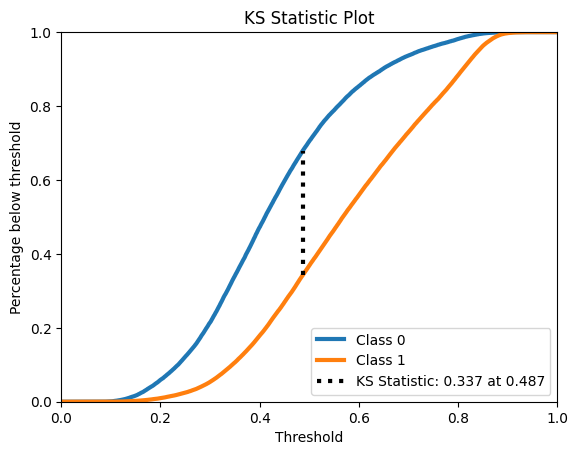

In [28]:
skplt.metrics.plot_ks_statistic(y_true=y_test, y_probas=y_probas)
plt.show()